In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("train.csv")
df.shape

(891, 12)

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Data preprocessing

In [8]:
#as cabin column has most missing values better to drop it.
df = df.drop(columns=["PassengerId",'Name','Ticket','Cabin'],errors = "ignore")
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [9]:
# replacing the missing values in age column with median value
#replacing the missing value in embarked column with mode values
df['Age'] = df["Age"].fillna(df["Age"].median())
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode())

In [10]:
# encoding the categorical variable sex
df["Sex"] = df["Sex"].map({"male" : 1, "female" : 0})

In [11]:
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [12]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,False,True
1,1,1,0,38.0,1,0,71.2833,False,False
2,1,3,0,26.0,0,0,7.9250,False,True
3,1,1,0,35.0,1,0,53.1000,False,True
4,0,3,1,35.0,0,0,8.0500,False,True


In [13]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

<Axes: xlabel='Survived', ylabel='count'>

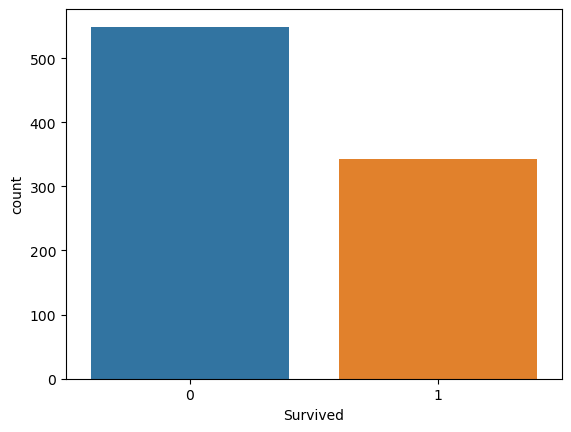

In [14]:
#data visualization
sns.countplot(x = 'Survived',data = df)

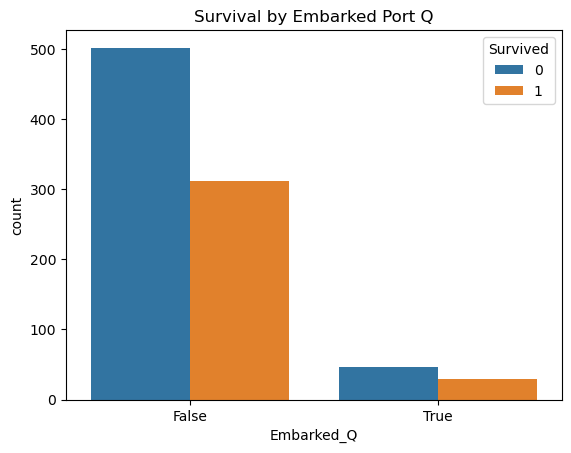

In [15]:
#suervival by embarked port
sns.countplot(x ='Embarked_Q', hue='Survived', data=df)
plt.title("Survival by Embarked Port Q")
plt.show()

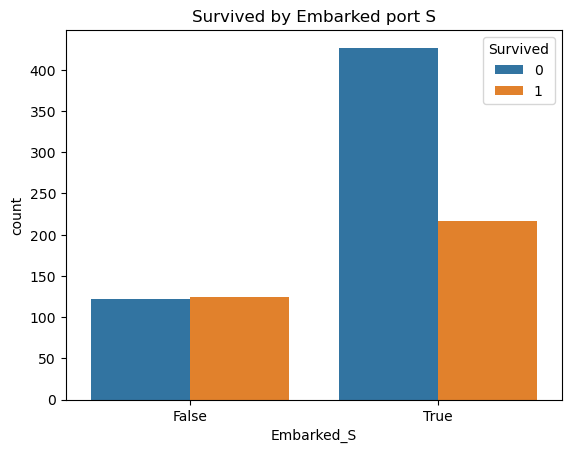

In [16]:
sns.countplot(x = "Embarked_S",hue = "Survived",data=df)
plt.title("Survived by Embarked port S")
plt.show()

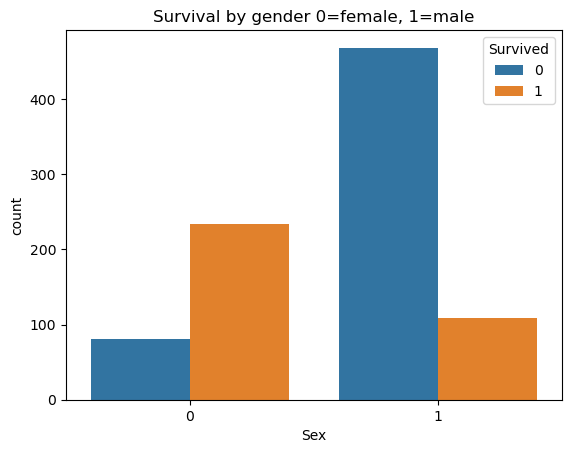

In [17]:
#survival by sex
sns.countplot(x="Sex",hue="Survived",data=df)
plt.title("Survival by gender 0=female, 1=male")
plt.show()

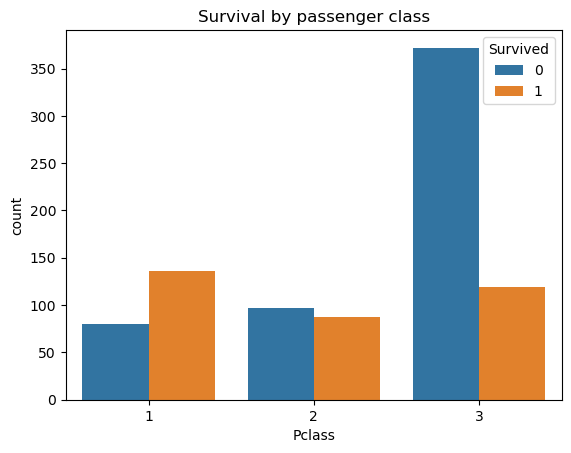

In [18]:
#survival by passenger class
sns.countplot(x = "Pclass",hue="Survived",data = df)
plt.title("Survival by passenger class")
plt.show()

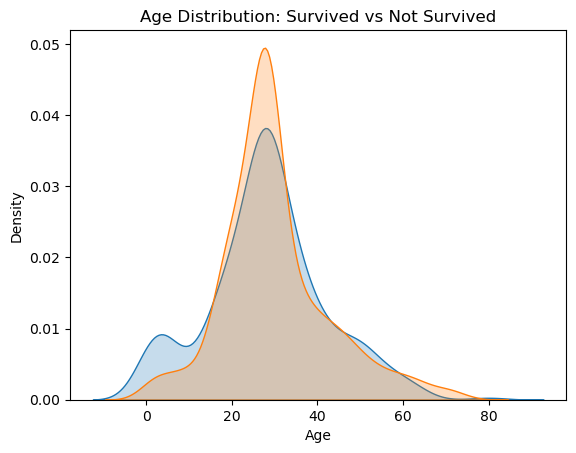

In [19]:
#age distribution by survival
sns.kdeplot(df[df['Survived']==1]['Age'], label="Survived", fill=True)
sns.kdeplot(df[df['Survived']==0]['Age'], label="Not Survived", fill=True)
plt.title("Age Distribution: Survived vs Not Survived")
plt.show()